## PHYS 249 Assignment 2:  Comparing Numerical Integration Techniques

(Based on Newman question 5.7/5.8 - see Chapter 5 of the text for details)

**2.1)** (based on Newman 5.7a) Consider the integral

$$I = \int^1_0 sin^2\sqrt{100x}\,dx\,.$$
We are going to try evaluating this integral, but first, plot the integrand over the interval [0,1] to see how it behaves.

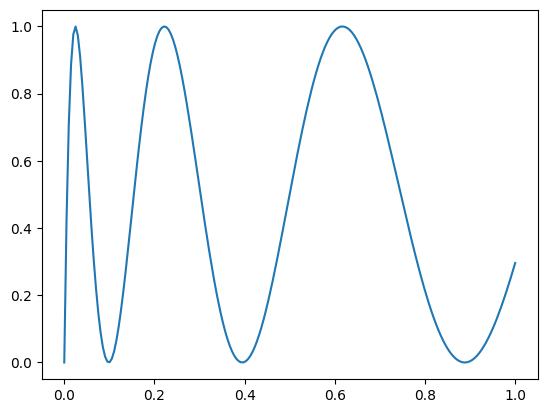

In [11]:
from numpy import linspace, sin, sqrt, square
from matplotlib import pyplot as plt

integrand = lambda x : square(sin(sqrt(100*x)))
x = linspace(0,1, num=200)
y = integrand(x)

plt.plot(x,y)
plt.show()


**2.2)** Now write a user-defined function to calculate $I$ using the trapezoid rule, given a number N slices to use. (Your function can also take the upper and lower limits of the integral as arguments, if you like.)

Then, using your function:

– start with $N = 1$ slice, then use $N = 2$, then $N = 4$ etc., doubling the number of slices used until the estimated relative accuracy is approximately $\epsilon = 10^{−6}$ or less, i.e. the answer is correct to six digits after the decimal point.

[Note you can estimate the accuracy in each step by assuming it is roughly the value at that step minus the value at the previous step. This is clearly closer to the accuracy of the **previous** step, but we will ignore this complication here.]

– print out, for each step, the number of slices $N$, the estimate of $I$, and the estimate of the accuracy $\epsilon$. You should find a final value for $I$ close to 0.45.


Also, we will want to plot the errors later on, so save them for later. An easy way to do this is to start an empty list for $N$ and one for the errors, and append to each list every time you change $N$. 

In [12]:


def trap_integrate(a, b, n, fun):
    sum = 0
    deltax = (b-a)/n


    for i in range(1, n):
        sum += fun(a + i*deltax)

    sum += 0.5*(fun(a) + fun(b))
    sum*= deltax
    return sum


trap_errors = []
trap_values = [0]
trap_ns = []


n = 1
idx = 0
while True:
    temp = trap_integrate(0, 1, n, integrand)
    trap_values.append(temp)
    trap_errors.append(abs(temp - trap_values[idx]))
    trap_ns.append(n)
    if trap_errors[idx] < 1e-6:
        break
    idx+=1
    n*=2

trap_values.pop(0)



0

**2.3)** (based on Newman 7.8) Repeat **2.2** using Simpson’s rule (starting with two slices, since this is the minimum required in this case.)

In [13]:
def simp_integrate(a, b, N, fun):
    deltax = (b-a)/N
    sum = 0
    evensum = 0
    oddsum = 0
    for i in range(1, N, 2):
        evensum += fun(a + i*deltax)

    evensum*=4
    for i in range(2, N, 2):
        oddsum += fun(a + i*deltax)
    oddsum *= 2
    sum+= evensum + oddsum + fun(a) + fun(b)
    sum *= (1/3)*deltax

    return sum

simp_values = [0]
simp_errors = []
simp_ns = []

n = 2
idx = 0
while True:
    temp = simp_integrate(0, 1, n, integrand)
    simp_values.append(temp)
    simp_errors.append(abs(temp - simp_values[idx]))
    simp_ns.append(n)
    if simp_errors[idx] < 1e-6:
        break
    idx+=1
    n*=2

simp_values.pop(0)


    

0

**2.4)** Plot $\log(|\epsilon|)$ versus $\log(N)$ for the two methods, together on a single plot. 

What do you conclude - which is the fastest way of reaching the required accuracy?

Also comment on the rate at which the error varies with $N$ in the two cases. Is it what you expect?

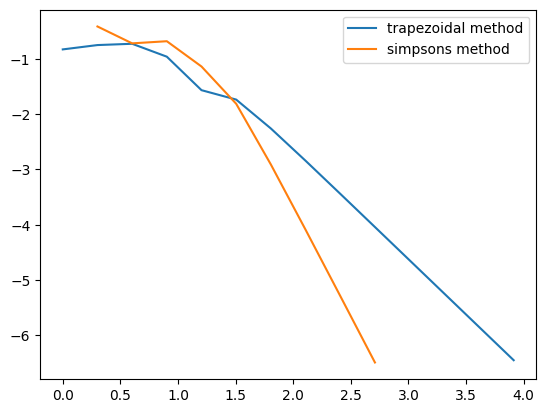

In [14]:
from numpy import log10, array

x_1 = log10(array(trap_ns))
y_1 = log10(array(trap_errors))
x_2 = log10(array(simp_ns))
y_2 = log10(array(simp_errors))
# x_1 = array(trap_ns)
# y_1 = array(trap_errors)
# x_2 = array(simp_ns)
# y_2 = array(simp_errors)

# print(x_1)

# plt.plot(x_1, y_1, x_2, y_2)
plt.plot(x_1, y_1, label = "trapezoidal method")
plt.plot(x_2, y_2, label = "simpsons method")
plt.legend()
plt.show()


Simpson's Rule reaches the required accuracy much faster than the trapezoidal rule, by about 16 times, which is expected based on the error terms shown in class for both methods. 